# Stepping Through a Pyteller Pipeline

In [1]:
from pyteller.data import load_data

 
## Load the input Data
Input data is loaded from s3 bucket

In [2]:
current_data,input_data = load_data('AL_Weather')
current_data.head()

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,feel
0,8A0,1/1/16 0:15,41.0,39.2,93.24,350,6,0.0,30.25,10.0,36.37
1,4A6,1/1/16 0:15,41.0,32.0,70.08,360,5,0.0,30.30,10.0,37.08
2,8A0,1/1/16 0:35,39.2,37.4,93.19,360,6,0.0,30.25,10.0,34.20
3,4A6,1/1/16 0:35,41.0,32.0,70.08,360,5,0.0,30.29,10.0,37.08
4,8A0,1/1/16 0:55,37.4,37.4,100.00,360,8,0.0,30.25,10.0,30.76


In [3]:
from mlblocks.discovery import find_pipelines
find_pipelines('pyteller')

['pyteller.ARIMA.arima',
 'pyteller.LSTM.LSTM',
 'pyteller.persistence.persistence']

In [4]:
pipeline = 'pyteller.persistence.persistence'

In [5]:
from pyteller.core import Pyteller

In [6]:
pyteller = Pyteller(
    pipeline=pipeline,
    pred_length=5,
    offset=0,
    time_column='valid',
    targets='tmpf',
    entity_column='station',
    entities='8A0',
)



In [7]:
context = pyteller.fit(current_data, output_=0)
train = context['X']
train.head()

,valid,tmpf
0,2016-01-01 00:15:00,41.0
1,2016-01-01 00:35:00,39.2
2,2016-01-01 00:55:00,37.4
3,2016-01-01 01:15:00,37.4
4,2016-01-01 01:35:00,37.4


## Finish fitting the pipeline

In [8]:
pyteller.fit(start_=1, **context)


## Forecast

In [9]:
output = pyteller.forecast(data=input_data, postprocessing=False, predictions_only=False)
output['forecasts'].head()

,tmpf
2016-02-04 10:15:00,35.6
2016-02-04 10:35:00,35.6
2016-02-04 10:55:00,35.6
2016-02-04 11:15:00,35.6
2016-02-04 11:35:00,35.6


## Evaluate

In [10]:
scores = pyteller.evaluate(actuals=output['actuals'],forecasts=output['forecasts'],
                           metrics=['MAPE','sMAPE'])
scores.head()

,tmpf
sMAPE,6.866832
MAPE,6.810585


## Plot

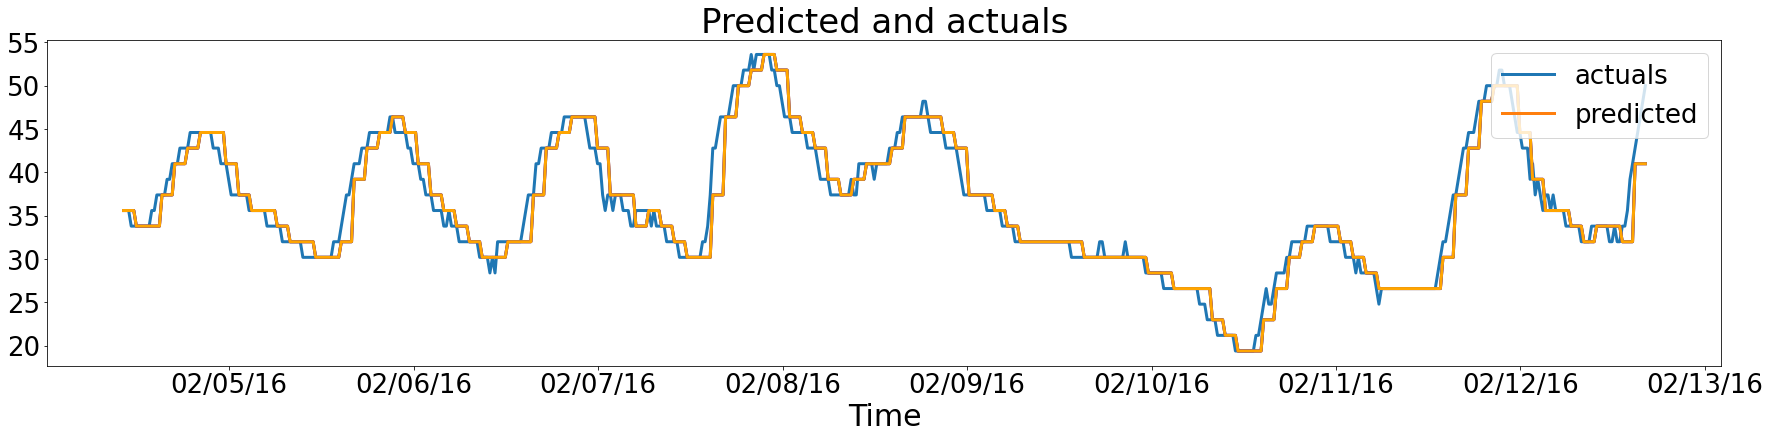

In [11]:
pyteller.plot(output)